In [48]:
from pandas import read_csv, DataFrame
import pandas as pd
import numpy as np

In [49]:
filepath = r'/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/non_supervised_analysis/notebooks/dataset_2/df_bakery_pre_proc.csv'

file_tag = 'Bakery'

bakery_sales = pd.read_csv(filepath)

In [50]:
%run 'scripts/dslabs_functions.py'

In [51]:
%run "scripts/data_functions.py"


data_functions lodaded


# Variable Encoding

## Ordinal Encoding


### Binary

In [52]:
from pandas import read_csv, DataFrame
#from dslabs_functions import get_variable_types, encode_cyclic_variables, dummify

data: DataFrame = read_csv(filepath)
vars: dict[str, list] = get_variable_types(data)

true_false: dict[str, int] = {"false": 0, "False": 0, "f": 0, False: 0, "true": 1, "True": 1, "t": 1, True: 1}

encoding: dict[str, dict[str, int]] = {
    "is_weekend": true_false,
}

data_enc: DataFrame = data.replace(encoding, inplace=False)
data_enc.head()

,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,...,is_weekend,day_of_week_nr,day_of_month,month,hour,min,time_of_day,season,Purchase value,product_category
0,23800.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,...,0,3.0,11.0,7.0,15.0,35.0,Afternoon,Summer,High,3
1,15800.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,3.0,11.0,7.0,16.0,10.0,Afternoon,Summer,Low,1
2,58000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,...,0,4.0,12.0,7.0,11.0,49.0,Morning,Summer,High,1
3,14800.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,5.0,13.0,7.0,13.0,19.0,Afternoon,Summer,Low,3
4,15600.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,5.0,13.0,7.0,13.0,22.0,Afternoon,Summer,Low,1


### Symbolic

In [53]:
# Ensure vars["symbolic"] only contains columns that exist in data_enc
vars["symbolic"] = [v for v in vars["symbolic"] if v in data_enc.columns]

for v in vars["symbolic"]:
    print(v, data_enc[v].unique())


place [nan '효자 3동' '후평 1동' '후평 2동' '석사동' '소양동' '퇴계동' '동면' '후평 3동' '신사우동' '강남동'
 '효자 1동' '조운동' '교동' '효자 2동' '약사명동' '근화동' '동내면' '교동 ' '신동면']
time_of_day ['Afternoon' 'Morning' 'Evening' 'Night']
season ['Summer' 'Fall' 'Winter' 'Spring']
Purchase value ['High' 'Low' 'Medium' nan]


In [54]:
data_enc = pd.get_dummies(data_enc, columns=["place"], prefix="address")

In [55]:
data_enc.head()

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,...,address_신사우동,address_약사명동,address_조운동,address_퇴계동,address_효자 1동,address_효자 2동,address_효자 3동,address_후평 1동,address_후평 2동,address_후평 3동
0,23800.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,14800.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,15600.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [56]:
ordinal_enc: dict[str, int] = {"High": 2, "Medium": 1, "Low": 0}

encoding: dict[str, dict[str, int]] = {
    "Purchase value": ordinal_enc,
}

data_enc: DataFrame = data_enc.replace(encoding, inplace=False)
data_enc.head()

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,...,address_신사우동,address_약사명동,address_조운동,address_퇴계동,address_효자 1동,address_효자 2동,address_효자 3동,address_후평 1동,address_후평 2동,address_후평 3동
0,23800.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,14800.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,15600.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


# Cyclic Variables

- time_of_day (performed manually)



- local_hour
- local_minute
- day_of_week_nr




In [57]:
for v in vars["numeric"]:
    print(v, sorted(data_enc[v].unique()))


total [12800.0, 13100.0, 13600.0, 13800.0, 14000.0, 14100.0, 14300.0, 14500.0, 14800.0, 15000.0, 15100.0, 15300.0, 15400.0, 15500.0, 15600.0, 15800.0, 16000.0, 16100.0, 16300.0, 16400.0, 16500.0, 16600.0, 16800.0, 17000.0, 17100.0, 17300.0, 17400.0, 17500.0, 17600.0, 17800.0, 17900.0, 18000.0, 18100.0, 18300.0, 18500.0, 18600.0, 18800.0, 18900.0, 19000.0, 19100.0, 19300.0, 19400.0, 19500.0, 19600.0, 19800.0, 19900.0, 20000.0, 20100.0, 20300.0, 20400.0, 20500.0, 20600.0, 20800.0, 20900.0, 21000.0, 21100.0, 21200.0, 21300.0, 21400.0, 21500.0, 21600.0, 21800.0, 21900.0, 22000.0, 22100.0, 22200.0, 22300.0, 22500.0, 22600.0, 22800.0, 22900.0, 23000.0, 23100.0, 23300.0, 23400.0, 23500.0, 23600.0, 23800.0, 23900.0, 24000.0, 24100.0, 24200.0, 24300.0, 24400.0, 24500.0, 24600.0, 24700.0, 24800.0, 24900.0, 25000.0, 25100.0, 25300.0, 25400.0, 25500.0, 25600.0, 25700.0, 25800.0, 25900.0, 26000.0, 26100.0, 26300.0, 26600.0, 26700.0, 26800.0, 26900.0, 27000.0, 27100.0, 27200.0, 27300.0, 27400.0, 275

## time_of_day

In [58]:
from math import pi, sin, cos

# Function to apply sin and cos on an already-mapped cyclic feature
def apply_sin_cos_for_mapped_column(data_enc, column):
    data_enc[column + '_sin'] = np.sin(data_enc[column])  # apply sine
    data_enc[column + '_cos'] = np.cos(data_enc[column])  # apply cosine
    return data_enc



day_of_week_encoding_mapping={
    'Night':0,   
    'Morning':pi/2,
    'Afternoon':pi,
    'Evening':-pi/2,   
}

season_mapping: dict[str, float] = {
    "Spring": 0,
    "Summer": pi / 2,
    "Fall": pi,
    "Winter": -pi / 2,
}

month_mapping = {
    1.0: 0, 
    2.0: (2 * np.pi / 12), 
    3.0: (4 * np.pi / 12), 
    4.0: (6 * np.pi / 12), 
    5.0: (8 * np.pi / 12), 
    6.0: (10 * np.pi / 12), 
    7.0: (12 * np.pi / 12), 
    8.0: (14 * np.pi / 12), 
    9.0: (16 * np.pi / 12), 
    10.0: (18 * np.pi / 12), 
    11.0: (20 * np.pi / 12), 
    12.0: (22 * np.pi / 12)
}


data_enc['time_of_day'] = encode_column_with_mapping(data_enc, 'time_of_day', day_of_week_encoding_mapping)
data_enc['month'] = encode_column_with_mapping(data_enc, 'month', month_mapping)
data_enc['season'] = encode_column_with_mapping(data_enc, 'season', season_mapping)



# Apply sine and cosine encoding for the mapped 'time_of_day'
data_enc = apply_sin_cos_for_mapped_column(data_enc, 'time_of_day')
data_enc = apply_sin_cos_for_mapped_column(data_enc, 'month')


# Drop the original 'time_of_day' column if needed
data_enc.drop('time_of_day', axis=1, inplace=True)
data_enc.drop('month', axis=1, inplace=True)




In [59]:
data_enc.head(15)

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,...,address_효자 1동,address_효자 2동,address_효자 3동,address_후평 1동,address_후평 2동,address_후평 3동,time_of_day_sin,time_of_day_cos,month_sin,month_cos
0,23800.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,...,False,False,False,False,False,False,1.224647e-16,-1.000000e+00,1.224647e-16,-1.0
1,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,1.224647e-16,-1.000000e+00,1.224647e-16,-1.0
2,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,...,False,False,False,False,False,False,1.000000e+00,6.123234e-17,1.224647e-16,-1.0
3,14800.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,1.224647e-16,-1.000000e+00,1.224647e-16,-1.0
4,15600.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,1.224647e-16,-1.000000e+00,1.224647e-16,-1.0
5,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,1.224647e-16,-1.000000e+00,1.224647e-16,-1.0
6,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,1.224647e-16,-1.000000e+00,1.224647e-16,-1.0
7,14000.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,False,False,False,False,False,False,1.224647e-16,-1.000000e+00,1.224647e-16,-1.0
8,19100.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,1.224647e-16,-1.000000e+00,1.224647e-16,-1.0
9,22300.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,1.224647e-16,-1.000000e+00,1.224647e-16,-1.0


## bulk cyclic variables

In [60]:
from math import pi, sin, cos

# Function to encode cyclic variables using sine and cosine
def cyclic_encode(value, x_max):
    # sine and cosine components to capture cyclic pattern
    value_sin = round(np.sin(2 * np.pi * value / x_max), 3)
    value_cos = round(np.cos(2 * np.pi * value / x_max), 3)
    return value_sin, value_cos


# Apply cyclic encoding for each variable, using both sin and cos

# Encoding for local_hour (0-23)
data_enc['hour_sin'], data_enc['hour_cos'] = zip(*data_enc['hour'].apply(lambda x: cyclic_encode(x, 23)))

# Encoding for local_minute (0-59)
data_enc['min_sin'], data_enc['min_cos'] = zip(*data_enc['min'].apply(lambda x: cyclic_encode(x, 59)))

# Encoding for day (1-31)
data_enc['day_of_month_sin'], data_enc['day_of_month_cos'] = zip(*data_enc['day_of_month'].apply(lambda x: cyclic_encode(x, 31)))

# Encoding for day_of_week (0-6)
data_enc['day_of_week_nr_sin'], data_enc['day_of_week_nr_cos'] = zip(*data_enc['day_of_week_nr'].apply(lambda x: cyclic_encode(x, 6)))

# encoding for week_of_month (0-4)
data_enc['week_of_month_sin'], data_enc['week_of_month_cos'] = zip(*data_enc['week_of_month'].apply(lambda x: cyclic_encode(x, 4)))


data_enc = data_enc.drop(['hour', 'min', 'day_of_month', 'day_of_week_nr','week_of_month'], axis=1)

# Verificar os resultados
data_enc.head(15)


,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,...,hour_sin,hour_cos,min_sin,min_cos,day_of_month_sin,day_of_month_cos,day_of_week_nr_sin,day_of_week_nr_cos,week_of_month_sin,week_of_month_cos
0,23800.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,...,-0.817,-0.577,-0.553,-0.833,0.791,-0.612,0.000,-1.0,0.0,-1.0
1,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.942,-0.335,0.875,0.485,0.791,-0.612,0.000,-1.0,0.0,-1.0
2,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,...,0.136,-0.991,-0.875,0.485,0.651,-0.759,-0.866,-0.5,0.0,-1.0
3,14800.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.398,-0.917,0.899,-0.437,0.485,-0.874,-0.866,0.5,0.0,-1.0
4,15600.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.398,-0.917,0.716,-0.698,0.485,-0.874,-0.866,0.5,0.0,-1.0
5,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.631,-0.776,-0.508,0.862,0.485,-0.874,-0.866,0.5,0.0,-1.0
6,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.817,-0.577,0.753,0.659,0.485,-0.874,-0.866,0.5,0.0,-1.0
7,14000.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,-0.817,-0.577,0.818,0.575,0.485,-0.874,-0.866,0.5,0.0,-1.0
8,19100.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.817,-0.577,0.638,-0.770,0.485,-0.874,-0.866,0.5,0.0,-1.0
9,22300.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.942,-0.335,-0.263,-0.965,0.485,-0.874,-0.866,0.5,0.0,-1.0


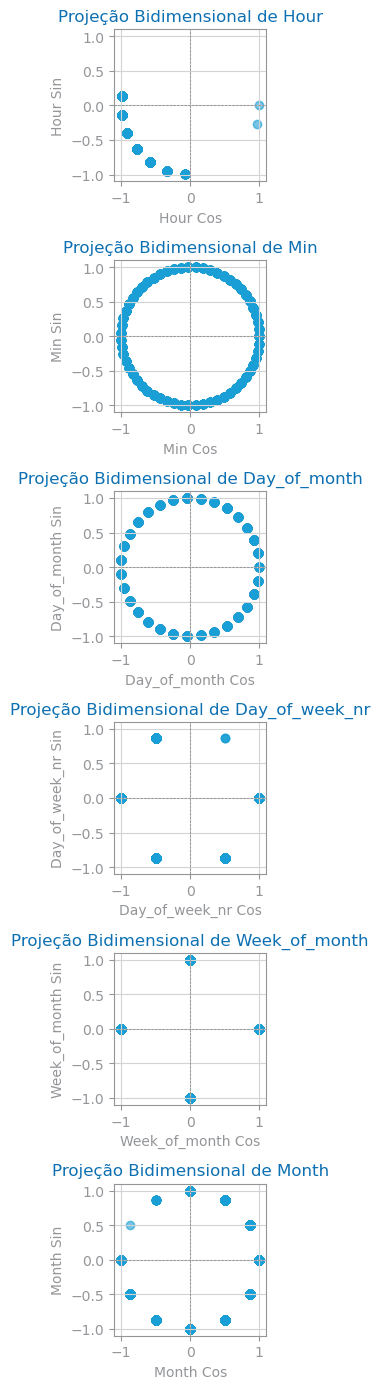

In [61]:
import matplotlib.pyplot as plt

# Lista de variáveis cíclicas
cyclical_vars = ['hour', 'min', 'day_of_month', 'day_of_week_nr','week_of_month', "month"]

# Criar gráficos de dispersão para cada variável cíclica com tamanho maior
plt.figure(figsize=(14, 14))  # Aumentando o tamanho da figura

for i, var in enumerate(cyclical_vars):
    # Valores de seno e cosseno para a variável atual
    x_values = data_enc[f'{var}_cos']
    y_values = data_enc[f'{var}_sin']
    
    # Criar um subplot para cada variável
    plt.subplot(len(cyclical_vars), 1, i + 1)
    plt.scatter(x_values, y_values, alpha=0.6)
    plt.axhline(0, color='gray', lw=0.5, ls='--')
    plt.axvline(0, color='gray', lw=0.5, ls='--')
    
    # Ajustar os limites dos eixos para melhor visualização
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    
    # Adicionar título e rótulos
    plt.title(f'Projeção Bidimensional de {var.capitalize()}')
    plt.xlabel(f'{var.capitalize()} Cos')
    plt.ylabel(f'{var.capitalize()} Sin')
    
    # Mostrar a grade
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')  # Para garantir que o gráfico é circular

plt.tight_layout()  # Ajustar o layout
plt.show()  # Mostrar todos os gráficos


In [62]:
# Ensure vars["symbolic"] only contains columns that exist in data_enc
vars["symbolic"] = [v for v in vars["symbolic"] if v in data_enc.columns]

for v in vars["symbolic"]:
    print(v, data_enc[v].unique())


season [ 1.57079633  3.14159265 -1.57079633  0.        ]
Purchase value [ 2.  0.  1. nan]


In [68]:
data_enc.head()

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,...,hour_sin,hour_cos,min_sin,min_cos,day_of_month_sin,day_of_month_cos,day_of_week_nr_sin,day_of_week_nr_cos,week_of_month_sin,week_of_month_cos
0,23800.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,...,-0.817,-0.577,-0.553,-0.833,0.791,-0.612,0.000,-1.0,0.0,-1.0
1,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.942,-0.335,0.875,0.485,0.791,-0.612,0.000,-1.0,0.0,-1.0
2,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,...,0.136,-0.991,-0.875,0.485,0.651,-0.759,-0.866,-0.5,0.0,-1.0
3,14800.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.398,-0.917,0.899,-0.437,0.485,-0.874,-0.866,0.5,0.0,-1.0
4,15600.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.398,-0.917,0.716,-0.698,0.485,-0.874,-0.866,0.5,0.0,-1.0


# correlation matrix

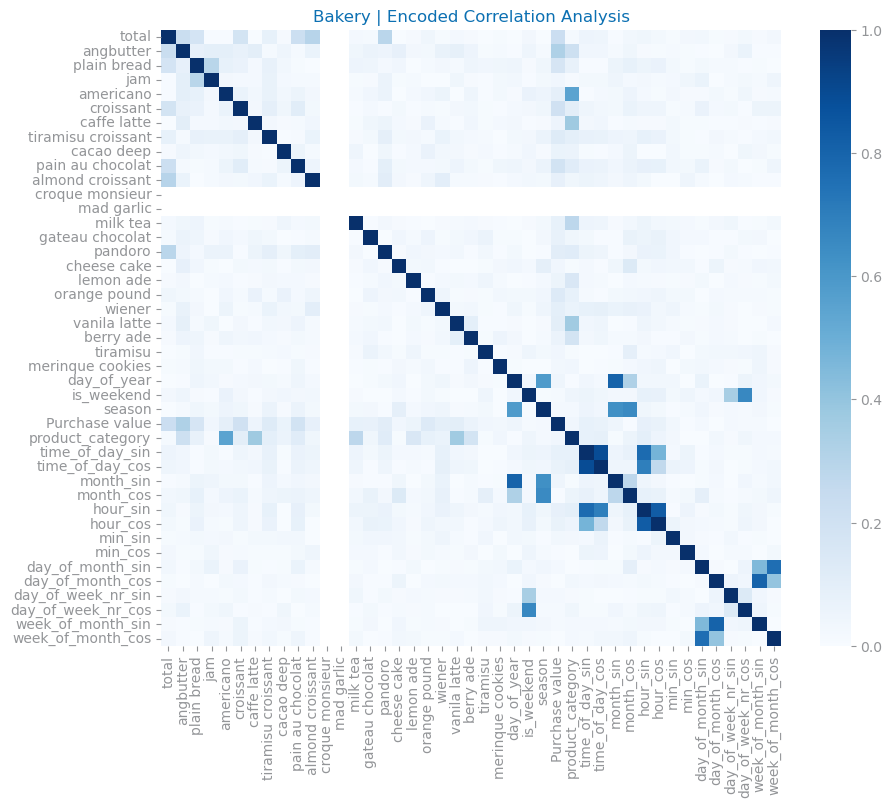

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
# Ensure only numeric columns are used for correlation
numeric_data = data_enc.select_dtypes(include='number')

# Calculate the correlation matrix
corr_mtx = numeric_data.corr().abs()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(
    corr_mtx,
    xticklabels=numeric_data.columns,
    yticklabels=numeric_data.columns,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1
)

plt.title(f'{file_tag} | Encoded Correlation Analysis')
plt.savefig(f"images/{file_tag}_enc_correlation_analysis.png")
plt.show()


In [69]:
data_enc.dtypes

total                 float64
angbutter             float64
plain bread           float64
jam                   float64
americano             float64
                       ...   
day_of_month_cos      float64
day_of_week_nr_sin    float64
day_of_week_nr_cos    float64
week_of_month_sin     float64
week_of_month_cos     float64
Length: 62, dtype: object

In [66]:
# Filter numeric columns only
numeric_data = data_enc.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns
corr_mtx = numeric_data.corr().abs()

# Mask the diagonal (correlation of a variable with itself)
np.fill_diagonal(corr_mtx.values, 0)

# Set a threshold for high correlation (e.g., 0.8 or higher)
threshold = 0.5

# Find the pairs of variables with high correlation
highly_correlated_pairs = []

# Iterate through the upper triangle of the correlation matrix to avoid duplicates
for col in corr_mtx.columns:
    for row in corr_mtx.index:
        if corr_mtx.loc[row, col] > threshold:
            highly_correlated_pairs.append((row, col, corr_mtx.loc[row, col]))

# Convert to DataFrame for better readability
correlated_df = pd.DataFrame(highly_correlated_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

# Display the result
print(correlated_df)


            Variable 1          Variable 2  Correlation
0     product_category           americano     0.547414
1               season         day_of_year     0.584922
2            month_sin         day_of_year     0.803121
3   day_of_week_nr_cos          is_weekend     0.663123
4          day_of_year              season     0.584922
5            month_sin              season     0.631434
6            month_cos              season     0.656064
7            americano    product_category     0.547414
8      time_of_day_cos     time_of_day_sin     0.892063
9             hour_sin     time_of_day_sin     0.771879
10     time_of_day_sin     time_of_day_cos     0.892063
11            hour_sin     time_of_day_cos     0.697351
12         day_of_year           month_sin     0.803121
13              season           month_sin     0.631434
14              season           month_cos     0.656064
15     time_of_day_sin            hour_sin     0.771879
16     time_of_day_cos            hour_sin     0

# save to csv

In [67]:
# Definir o caminho para salvar o arquivo CSV
filepath = r'/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/non_supervised_analysis/notebooks/dataset_2/df_bakery_encoded.csv'

# Salvar o DataFrame em CSV
data_enc.to_csv(filepath, index=False)

data_enc.head()

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,...,hour_sin,hour_cos,min_sin,min_cos,day_of_month_sin,day_of_month_cos,day_of_week_nr_sin,day_of_week_nr_cos,week_of_month_sin,week_of_month_cos
0,23800.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,...,-0.817,-0.577,-0.553,-0.833,0.791,-0.612,0.000,-1.0,0.0,-1.0
1,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.942,-0.335,0.875,0.485,0.791,-0.612,0.000,-1.0,0.0,-1.0
2,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,...,0.136,-0.991,-0.875,0.485,0.651,-0.759,-0.866,-0.5,0.0,-1.0
3,14800.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.398,-0.917,0.899,-0.437,0.485,-0.874,-0.866,0.5,0.0,-1.0
4,15600.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.398,-0.917,0.716,-0.698,0.485,-0.874,-0.866,0.5,0.0,-1.0
